#**Cluster Analysis**

###When red and blue colors are mixed in varying proportions, a range of new colors can be produced, depending on the intensity of each component. The resulting color variations are due to the different degrees of blending between red and blue, which generate intermediate shades. To analyze these color distributions more effectively, we applied clustering techniques aimed at identifying the optimal number of distinct color groups present in the image.



###In this section, we employed several established methods to determine the minimum and most meaningful number of clusters: the Elbow Method, the Davies-Bouldin Index, and the Calinski-Harabasz Index. These methods were chosen for their robustness and reliability in evaluating clustering performance. By comparing the outcomes of each approach, we were able to determine a consistent and credible clustering solution that accurately reflects the underlying color distribution in the image.

## Install necessary Libraby

In [ ]:
!pip install kneed

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from kneed import KneeLocator
from sklearn.metrics import davies_bouldin_score
import cv2
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt



In [ ]:
image_path_data = './sample_data/5050_210_SP_001_O.jpg'

## K-Means and Elbow Method

In [ ]:
###########################################################
############ K-mean Clustering  ###########################
###########################################################
############ K-MEANS CLUSTERING ###########################
###########################################################


def analyze_clusters(image_path, n_clusters=3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(pixels)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Count the number of pixels in each cluster
    unique, counts = np.unique(labels, return_counts=True)
    for i in range(n_clusters):
        print(f"Cluster {i+1}: Color {centers[i].astype(int)}, Pixels: {counts[i]}")

# Example usage
analyze_clusters(image_path_data)

Cluster 1: Color [28  0 21], Pixels: 6198466
Cluster 2: Color [11  2 45], Pixels: 6915221
Cluster 3: Color [1 0 3], Pixels: 4866849


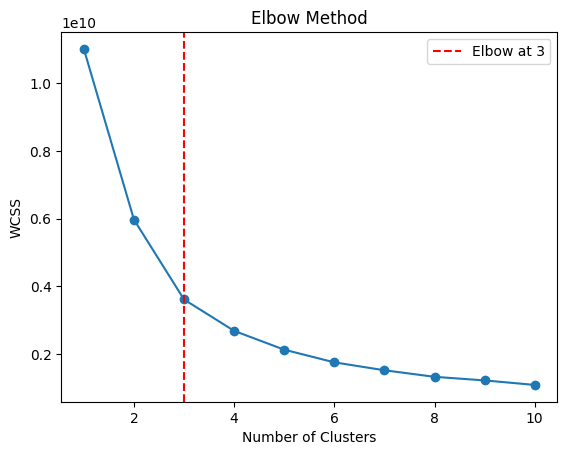

Optimal number of clusters: 3


In [ ]:


def elbow_method(image_path, max_clusters=10):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)

    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(pixels)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS

    # Find the elbow point
    kneedle = KneeLocator(range(1, max_clusters + 1), wcss, curve='convex', direction='decreasing')
    elbow_point = kneedle.elbow

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow at {elbow_point}')
    plt.legend()
    plt.show()

    return elbow_point

# Example usage
elbow_point = elbow_method(image_path_data)
print(f"Optimal number of clusters: {elbow_point}")

## Davies Bouldin Method

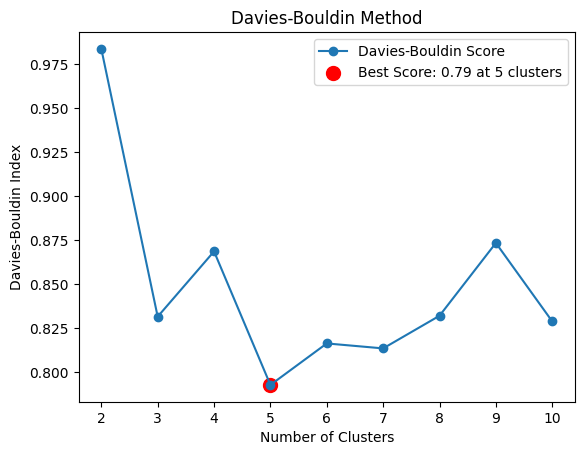

In [ ]:


def davies_bouldin_method(image_path, max_clusters=10):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)

    db_scores = []
    for i in range(2, max_clusters + 1):  # At least 2 clusters are needed
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(pixels)
        score = davies_bouldin_score(pixels, labels)
        db_scores.append(score)

    # Find the best score (minimum DBI)
    best_score = min(db_scores)
    best_index = db_scores.index(best_score)
    best_clusters = best_index + 2  # +2 because we start from 2 clusters

    # Plot the Davies-Bouldin scores
    plt.plot(range(2, max_clusters + 1), db_scores, marker='o', label='Davies-Bouldin Score')
    plt.scatter(best_clusters, best_score, color='red', s=100, label=f'Best Score: {best_score:.2f} at {best_clusters} clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Davies-Bouldin Index')
    plt.title('Davies-Bouldin Method')
    plt.legend()
    plt.show()

# Example usage
davies_bouldin_method(image_path_data)

## Calinski-Harabasz Index Method

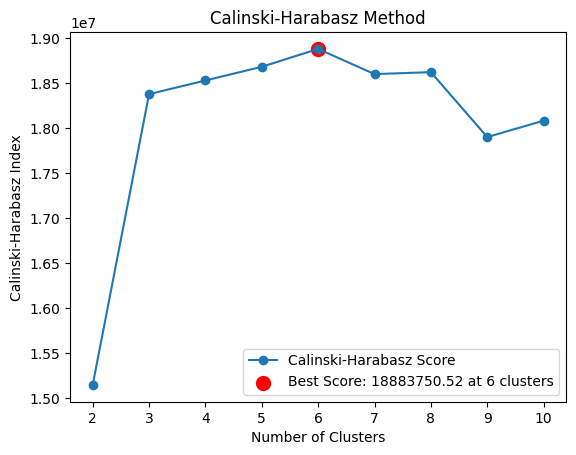

In [ ]:


def calinski_harabasz_method(image_path, max_clusters=10):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)

    ch_scores = []
    for i in range(2, max_clusters + 1):  # At least 2 clusters are needed
        kmeans = KMeans(n_clusters=i, random_state=42)
        labels = kmeans.fit_predict(pixels)
        score = calinski_harabasz_score(pixels, labels)
        ch_scores.append(score)

    # Find the best score (maximum CHI)
    best_score = max(ch_scores)
    best_index = ch_scores.index(best_score)
    best_clusters = best_index + 2  # +2 because we start from 2 clusters

    # Plot the Calinski-Harabasz scores
    plt.plot(range(2, max_clusters + 1), ch_scores, marker='o', label='Calinski-Harabasz Score')
    plt.scatter(best_clusters, best_score, color='red', s=100, label=f'Best Score: {best_score:.2f} at {best_clusters} clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Calinski-Harabasz Index')
    plt.title('Calinski-Harabasz Method')
    plt.legend()
    plt.show()

# Example usage
calinski_harabasz_method(image_path_data)